# Dimensionality Reduction
Applied pca in R with 15 components and 90.22% cumulative variance

In [294]:
#import dataset
import numpy as np
import pandas as pd
train = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/pca_ff.csv")
label = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/label_ff.csv")

In [333]:
#test & train dataset
data = np.array(train)
label = np.array(label)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.10, random_state=111)



# Multi-label K Nearest Neighbor

In [10]:
#multilabel knn
#cross-validation
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(2,8),'s':[0.5]}
#score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring='f1_micro', cv=5)
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)


{'k': 7, 's': 0.5} 0.3775568588184809


best k=7,s=0.5

# Rndom Forest

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier
#cross-validation
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(20,50),'class_weight':['balanced'] }
score = 'f1_micro'

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring=score, cv=5)
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)



{'class_weight': 'balanced', 'n_estimators': 43} 0.3678300672292948


In [ ]:
#cutoff change
scores = []
for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators = 43,class_weight = 'balanced')
    clf.fit(X_train, y_train)
    prob = clf.predict_proba(X_train)
    y = []
    for i in range(0,24):
        y.append ( (prob[i][:,1]>cutoff).astype(int) )
    
    ypred = pd.DataFrame(y).transpose()

    y_1 = pd.DataFrame(y_train)

    validated = f1_score(y_1,ypred,average=None)
    scores.append(validated) 

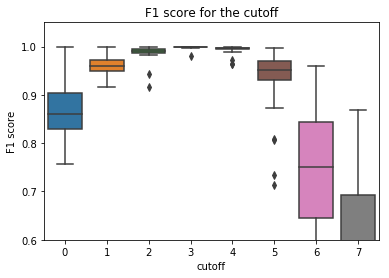

In [253]:
import seaborn as sns
from matplotlib import pyplot as plt
scores_f = pd.DataFrame(scores)
sns.boxplot(data=scores_f.transpose())
plt.xlabel('cutoff')
plt.ylabel('F1 score')
plt.title('F1 score for the cutoff')
plt.ylim(0.6,1.05)
plt.show()

beset cutoff=0.4

# Linear Discriminant Analysis (minority classes)

In [548]:
label_lda = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/label_lda.csv")
label_lda = np.array(label_lda)
X_train_up, X_test_up, y_train_lda, y_test_lda = train_test_split(data, label_lda, test_size=0.10, random_state=111)
y_train_lda = np.ravel(y_train_lda)
y_test_lda = np.ravel(y_test_lda)


In [549]:
# number of components = class-1 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)

X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
X_1 = lda.fit(X_train_up, y_train_lda).transform(X_test_up)

In [554]:
#update dataset
weak = [8,15,27]
for j in weak:
    #X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
    #X_r = lda.fit(X_train_up, y_train_lda).transform(X_test_up)
    for i in range(0,X_train_up.shape[0]):
        if y_train[:,j][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
    for k in range(0,X_test.shape[0]):
        if y_test[:,j][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0

double = [9]
for j in double:
    #X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
    #X_r = lda.fit(X_train_up, y_train_lda).transform(X_test_up)
    for i in range(0,X_train_up.shape[0]):
        if y_train[:,j][i]==1 and y_train[:,j+1][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
        elif (y_train[:,j][i]==1):
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
        elif y_train[:,j+1][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0


    for k in range(0,X_test.shape[0]):
        if y_test[:,j][k]==1 and y_train[:,j+1][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0
        elif y_test[:,j][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0
        elif y_test[:,j+1][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0


In [555]:
#knn with k=7,s=0.5
# train
classifier_knn = MLkNN(k=7,s=0.5)
classifier_knn.fit(X_train_up, y_train)

# predict
prediction_knn_up = classifier_knn.predict(X_test_up)

#test dataset
from sklearn.metrics import f1_score
y_pred_knn_up = pd.DataFrame(np.array(prediction_knn_up.todense()))
y_test1 = pd.DataFrame(y_test)
print(f1_score(y_test1, y_pred_knn_up, average=None))
print("knn Accuracy:",accuracy_score(y_test,y_pred_knn_up))
f1_score(y_test1, y_pred_knn_up, average='macro')

[0.77194299 0.72888889 0.72496025 0.59778598 0.70198675 0.59444444
 0.35211268 0.40816327 0.8        0.         0.         0.56603774
 0.56074766 0.51351351 0.8436019  0.4        0.         0.
 0.26865672 0.37962963 0.         0.56580938 0.58741259 0.66666667
 0.17647059 0.590681   0.25       0.        ]
knn Accuracy: 0.36518661518661516


/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4303397367129817

In [556]:
#random forest
#test data accuracy with ntree=43, cutoff=0.4
clf = RandomForestClassifier(n_estimators = 43,class_weight = 'balanced')
clf.fit(X_train_up, y_train)
prob_up = clf.predict_proba(X_test_up)
y_up = []
for i in range(0,y_test.shape[1]):
    y_up.append ( (prob_up[i][:,1]>0.4).astype(int) )
    
prediction_rf_up = np.array(pd.DataFrame(y_up).transpose())

print("random forest Accuracy:",accuracy_score(y_test,prediction_rf_up))
y_pred_rf_up = pd.DataFrame(prediction_rf_up)
y_test_rf = pd.DataFrame(y_test)
print(f1_score(y_test_rf, y_pred_rf_up, average=None))
print(f1_score(y_test1, y_pred_rf_up, average='macro'))

random forest Accuracy: 0.3819176319176319
[0.79768786 0.68269231 0.74203822 0.58646617 0.68918919 0.61917808
 0.39215686 0.44851259 0.66666667 0.         0.         0.52777778
 0.50485437 0.52054795 0.84263959 0.66666667 0.         0.
 0.31111111 0.43636364 0.         0.60059172 0.60740741 0.6328125
 0.38888889 0.64675325 0.1875     0.66666667]
0.4701846236857499


/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
